In [1]:
# Libraries
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


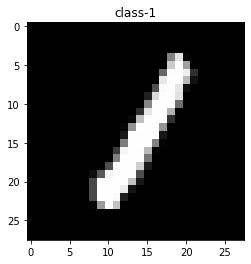

Train image 21019-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  131 228   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  203 254 160   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 102
  253 254 239  48   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 232
  254 254 185  18   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [2]:
# Read the data

def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


# dataset_path = '../'

# train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
# train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

# test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
# test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images("train-images-idx3-ubyte.gz")
train_labels = read_labels("train-labels-idx1-ubyte.gz")
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images("t10k-images-idx3-ubyte.gz")
test_labels = read_labels("t10k-labels-idx1-ubyte.gz")
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [3]:
# Flatten the data
train_flat = train_images.reshape(60000, 28*28)
train_flat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_img , val_img, train_lab, val_lab = train_test_split(train_flat, train_labels, test_size=0.1)

In [6]:
train_img.shape, train_lab.shape, val_img.shape, val_lab.shape 

((54000, 784), (54000,), (6000, 784), (6000,))

In [8]:
# standerize the data
val_std = val_img - val_img.mean(axis = 1).reshape(6000, 1)

In [9]:
# random image
def random_image(x):
    ran = np.random.choice(x.shape[0])
    plt.imshow(x[ran].reshape(28,28), cmap="gray")
    plt.show()
    
def random_sample_image(x):
    fig, axes = plt.subplots(nrows = 5, ncols = 5)
    ran = np.random.choice(x.shape[0], 25)
    k = 0
    for ax in axes.flat:
        ax.imshow(x[ran[k]].reshape(28, 28), cmap = "gray")
        k += 1

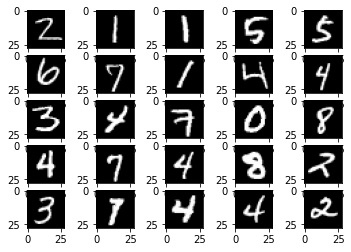

In [10]:
random_sample_image(val_img)

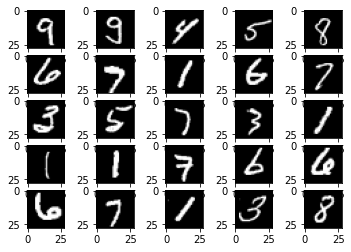

In [11]:
random_sample_image(val_std) 

In [16]:

distances = pairwise_distances(val_std)
distances.shape

(6000, 6000)

In [17]:
# Gram Matrix
part = np.eye(distances.shape[0], distances.shape[1]) - np.ones(distances.shape)*(1/distances.shape[0])
gram = np.dot(np.dot(part, distances**2), part)*(-1/2)
gram

array([[3337389.50075213, -212739.64164603,  432633.05233716, ...,
        -847900.18580804,  864850.29889329,  742192.79862162],
       [-212739.64164603, 3187763.684068  , -171412.29414264, ...,
        -448767.54631846, -682671.2822804 , -386962.55551124],
       [ 432633.05233716, -171412.29414263, 2247867.29779975, ...,
        -901548.43014136, -238096.55768492, -546137.4048954 ],
       ...,
       [-847900.18580801, -448767.54631846, -901548.43014134, ...,
        4275475.09574409,  156794.05110864,  194606.82379612],
       [ 864850.2988933 , -682671.2822804 , -238096.55768493, ...,
         156794.05110863, 3091231.21948342,  379127.92329336],
       [ 742192.79862161, -386962.55551126, -546137.4048954 , ...,
         194606.82379614,  379127.92329338, 5911760.05057267]])

In [18]:
gram.shape

(6000, 6000)

In [19]:
# Eigen Values and corresponding eigen vectors in ascending order
values, vectors = np.linalg.eigh(gram)

In [20]:
values.shape

(6000,)

In [21]:
vectors.shape

(6000, 6000)

In [22]:
# Top 2 eigen values
eig_values = np.array([values[-1], values[-2]])
eig_values

array([1.69729794e+09, 1.47175369e+09])

In [23]:
# Top 2 eigen vectors
eig_vectors = np.matrix([vectors[-1], vectors[-2]])
eig_vectors.shape

(2, 6000)

In [30]:
# projection Matrix
projection = np.dot(np.diag(np.sqrt(eig_values)), eig_vectors)
projection

matrix([[-678.62662863, -951.73119075, -112.6559266 , ...,  811.62833445,
         -570.58616312, 1204.85643888],
        [-962.29535203, -550.23995436,  101.72447792, ...,  885.43622728,
         -524.16251506,  209.35497691]])

In [31]:
projection.shape

(2, 6000)

In [32]:
projection.T

matrix([[-678.62662863, -962.29535203],
        [-951.73119075, -550.23995436],
        [-112.6559266 ,  101.72447792],
        ...,
        [ 811.62833445,  885.43622728],
        [-570.58616312, -524.16251506],
        [1204.85643888,  209.35497691]])

Text(0.5, 1.0, 'Projection of mnist on 2 dimension')

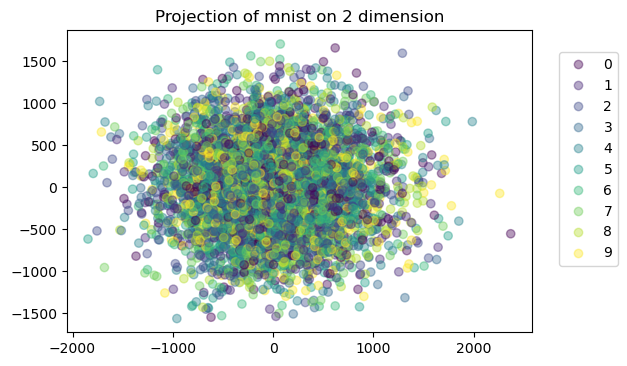

In [69]:
plt.figure(dpi = 100)

scat = plt.scatter(np.array(projection[0]).flatten(), np.array(projection[1]).flatten(), c = val_lab, alpha = 0.4)

plt.legend(handles = scat.legend_elements()[0], labels = list(np.unique(val_lab)),bbox_to_anchor = [1.2, 0.95])

plt.title("Projection of mnist on 2 dimension")

In [ ]:
# Using Sklearn

In [ ]:
mds = MDS()
proj_mat = mds.fit_transform(val_img)
proj_mat

In [ ]:
plt.figure(dpi = 100)

scat = plt.scatter(np.array(proj_mat[:, 0]).flatten(), np.array(proj_mat[:, 1]).flatten(), c = val_lab, alpha = 0.4)

plt.legend(handles = scat.legend_elements()[0], labels = list(np.unique(val_lab)),bbox_to_anchor = [1.2, 0.95])

plt.title("Projection of mnist on 2 dimension with sklearn")

In [ ]:
# Fin